<a href="https://colab.research.google.com/github/renatarep-ad/AD_Acoes_Petrobras_01/blob/main/ad_bolsa_petrobras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de dados para ações da bolsa de valores - Petrobras com Pandas e Matplotlib.**

* Obter csv com, pelo menos, 90 dias de uma açãoo PTR4.
* Importar, com pandas, o arquivo para um *dataframe* (df).
  * O arquivo possui 7 colunas.
* Criar um df com o nome 'ptr_resumo' com as colunas 'Data' e 'Fechamento'.
* Exportar um novo df com o nome 'ptr_resumo.csv' com as 2 colunas.

*Análise* :
1. Qual é o preço médio das ações da Petrobras no período coletado?
2. Quais são os preços, máximo e mínimo, que o papel alcançou no período? E  quais foram as respectivas datas?
3. Se um investidor tivesse adquirido 200 ações no 10° dia do período, qual seria o valor dos papeis no 50° dia do investimento? Seria lucro ou prejuízo? E quanto para lucro ou prejuízo?
4. Adicionar um gráfico que plote os dados dos papeis da Petrobras ao longo do período coletado.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Importar o arquivo para o df ptr4_df (últimos 90 dias)
ptr4_df = pd.read_csv('/content/Petrobras PETR4.csv')

#Criar um df com as colunas Data e Fechamento
ptr_resumo = ptr4_df[['DATA', 'FECHAMENTO']].copy()

#Ajustar a coluna Fechamento para o formato float
ptr_resumo['FECHAMENTO'] = ptr_resumo['FECHAMENTO'].str.replace(',','.').astype(float)
ptr_resumo['DATA'] = pd.to_datetime(ptr_resumo['DATA'], format="%d/%m/%Y")

#ptr_resumo.info()

In [ ]:
#Exportar o df ptr_resumo no formato csv
ptr_resumo.to_csv('ptr_resumo.csv',index=False)

In [ ]:
#Período
#ptr4_df['DATA'] = pd.to_datetime(ptr4_df['DATA'])
ptr4_df.sort_values('DATA', ascending=True)

,DATA,ABERTURA,FECHAMENTO,VARIAÇÃO,MÍNIMO,MÁXIMO,VOLUME
60,01/02/2024,"38,04","38,78","2,77","37,94","39,07","2,38B"
41,01/03/2024,"37,64","37,48","0,10","37,44","38,11","1,18B"
21,01/04/2024,"34,98","35,12","0,78","34,71","35,18","822,54M"
82,02/01/2024,"34,93","35,24","1,45","34,89","35,35","844,72M"
59,02/02/2024,"38,79","38,28","-1,30","38,27","38,97","1,41B"
...,...,...,...,...,...,...,...
42,29/02/2024,"37,86","37,44","-0,72","37,17","38,47","2,33B"
1,29/04/2024,"39,76","40,40","1,79","39,61","40,40","1,11B"
62,30/01/2024,"37,47","37,61","-0,62","37,36","38,00","1,31B"
0,30/04/2024,"40,26","40,28","-0,31","39,89","40,46","1,47B"


In [ ]:
# Qual é o preço médio das ações da Petrobras no período coletado?
preco_medio = ptr_resumo['FECHAMENTO'].mean()
print(f'O preço médio das ações da Petrobras no período (2024-01-02 a 2024-04-30) foi: R${preco_medio: .2f}.')

O preço médio das ações da Petrobras no período (2024-01-02 a 2024-04-30) foi: R$ 36.75.


In [ ]:
ptr4_df.sort_values('MÍNIMO', ascending=True)

,DATA,ABERTURA,FECHAMENTO,VARIAÇÃO,MÍNIMO,MÁXIMO,VOLUME
36,2024-03-08,"33,49","33,69","-10,57","32,74","34,57","7,77B"
35,2024-03-11,"33,28","33,26","-1,30","32,93","35,21","4,28B"
26,2024-03-22,"33,49","33,63","0,98","33,05","33,79","1,15B"
30,2024-03-18,"33,97","33,90","0,05","33,12","34,19","1,15B"
29,2024-03-19,"33,95","33,65","-0,74","33,17","34,38","1,64B"
...,...,...,...,...,...,...,...
2,2024-04-26,"39,58","39,69","0,78","39,37","40,05","1,26B"
44,2024-02-27,"39,83","39,77","-0,14","39,53","39,94","1,10B"
1,2024-04-29,"39,76","40,40","1,79","39,61","40,40","1,11B"
50,2024-02-19,"39,89","40,02","0,49","39,70","40,06","512,20M"


In [ ]:
#Quais são os preços, máximo e mínimo, que o papel alcançou no período? E quais foram as respectivas datas?
preco_minimo = ptr_resumo['FECHAMENTO'].min()
data_min = ptr_resumo.loc[ptr_resumo['FECHAMENTO'].idxmin(),'DATA']
print(f'O preço mínimo das ações da Petrobras no período foi: R${preco_minimo: .2f}. Data da ocorrência: {data_min}')

preco_maximo = ptr_resumo['FECHAMENTO'].max()
data_max = ptr_resumo.loc[ptr_resumo['FECHAMENTO'].idxmax(),'DATA']
print(f'O preço máximo das ações da Petrobras no período foi: R${preco_maximo: .2f}. Data da ocorrência: {data_max}')


O preço mínimo das ações da Petrobras no período foi: R$ 33.26. Data da ocorrência: 11/03/2024
O preço máximo das ações da Petrobras no período foi: R$ 40.40. Data da ocorrência: 29/04/2024


In [ ]:
# Se um investidor tivesse adquirido 200 ações no 10° dia do período, qual seria o valor dos papeis no 50° dia do investimento? Seria lucro ou prejuízo? E quanto para lucro ou prejuízo?

acoes = 200
data_compra = ptr_resumo.iloc[9]['DATA']
preco_compra = ptr_resumo.iloc[9]['FECHAMENTO']

data_venda =  ptr_resumo.iloc[49]['DATA']
preco_venda = ptr_resumo.iloc[49]['FECHAMENTO']

valor_investido = acoes * preco_compra

valor_final = preco_venda - preco_compra

print(f'O valor das ações no 50° dia foi: R$ {preco_venda:.2f}')
print(f'O invetidor teve {"lucro" if valor_final>0 else "prejuízo"} de R$ {abs(valor_final):.2f}')


O valor das ações no 50° dia foi: R$ 39.60
O invetidor teve lucro de R$ 2.49


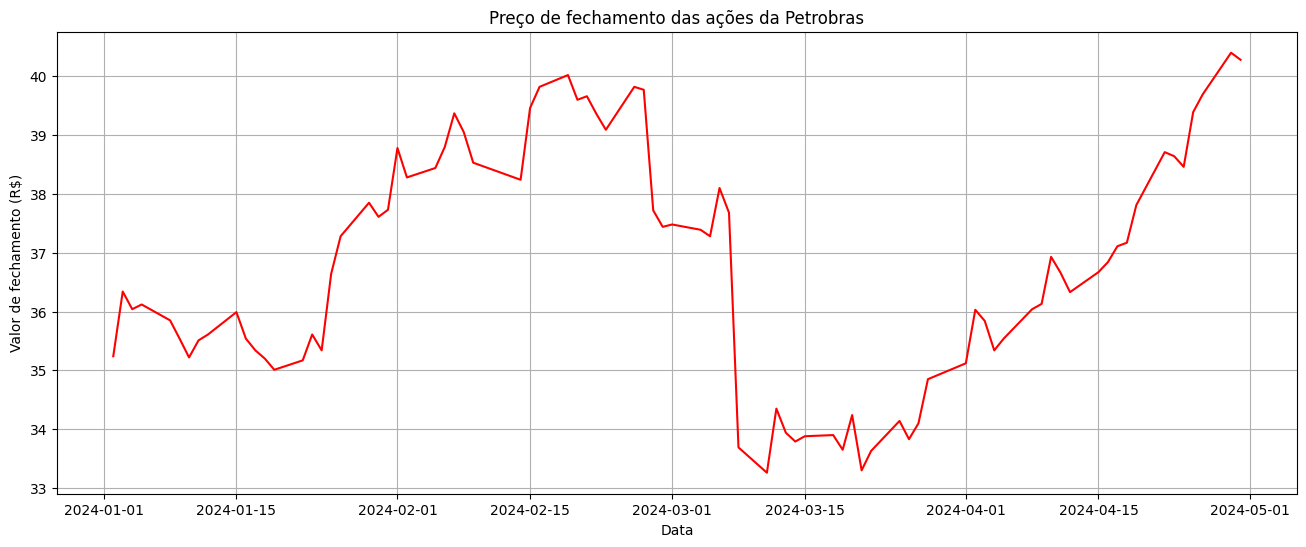

In [ ]:
#Gráfico que plote os dados dos papeis da Petrobras ao longo do período coletado

plt
plt.figure(figsize=(16,6))
plt.title('Preço de fechamento das ações da Petrobras')
plt.xlabel('Data')
plt.ylabel('Valor de fechamento (R$)')
plt.grid()
plt.plot(ptr_resumo['DATA'],ptr_resumo['FECHAMENTO'],label='Fechamento', color = 'red')
plt.show()
